<a href="https://colab.research.google.com/github/Ronaldo-khagokpam/DEEP-LEARNING/blob/main/phee8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip phee8.zip

Archive:  phee8.zip
   creating: phees8/
   creating: phees8/test/
   creating: phees8/test/khudei/
  inflating: phees8/test/khudei/khudei1.jpg  
  inflating: phees8/test/khudei/khudei10.jpg  
  inflating: phees8/test/khudei/khudei12.jpg  
  inflating: phees8/test/khudei/khudei3.jpg  
  inflating: phees8/test/khudei/khudei5.jpg  
  inflating: phees8/test/khudei/khudei9.jpg  
   creating: phees8/test/kokyet/
  inflating: phees8/test/kokyet/kokyet1.jpg  
  inflating: phees8/test/kokyet/kokyet2.jpg  
  inflating: phees8/test/kokyet/kokyet3.jpg  
  inflating: phees8/test/kokyet/kokyet4.jpg  
  inflating: phees8/test/kokyet/kokyet5.jpg  
   creating: phees8/test/leirumphee/
  inflating: phees8/test/leirumphee/l1.jpeg  
  inflating: phees8/test/leirumphee/L2.jpg  
  inflating: phees8/test/leirumphee/l20.jpeg  
  inflating: phees8/test/leirumphee/l25.jpg  
  inflating: phees8/test/leirumphee/l37.jpg  
  inflating: phees8/test/leirumphee/l38.jpg  
  inflating: phees8/test/leirumphee/L5.jpg  
 

In [58]:
# pip install tensorflow streamlit matplot numpy pandas
import os
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import torch
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms


In [4]:
data_train_path = 'phees8/train'
data_test_path = 'phees8/test'
data_val_path = 'phees8/validation'



In [5]:
img_width=180
img_height=180
 #'''means all images will be resized to 180×180 pixels when loaded using image_dataset_from_directory.'''

phee_classes =train.class_names #retrieves the list of class names automatically inferred by image_dataset_from_directory.
phee_classes

In [13]:
phee_classes = data_train.class_names
phee_classes
 #retrieves the list of class names automatically inferred by image_dataset_from_directory. phee_classes

['khudei',
 'kokyet',
 'leirumphee',
 'phanekmapanaibi',
 'phigephanek',
 'raniphee',
 'thamballeikhok',
 'wangkheiphee']

In [12]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,             # Path to the directory containing the image data
    shuffle=True,                # Shuffle the dataset
    image_size=(img_width, img_height),  # Resize all images to this size
    batch_size=32,               # Number of images per batch
    validation_split=False       # No validation split; load all images for training
)

Found 160 files belonging to 8 classes.


In [14]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,#This is the path to the directory containing the validation images
                                                       image_size=(img_height,img_width),#This resizes the images to a specific size, (img_height, img_width), before they are fed into the model.
                                                       batch_size=32,#Sets the number of images to load in each batch during evaluation. 32 images per batch will be loaded at a time for evaluation.
                                                        shuffle=False,#Controls whether the dataset should be shuffled before being passed to the model.
                                                       validation_split=False)#  the entire dataset is being used as the validation set.

Found 59 files belonging to 8 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,#This is the path to the directory containing the test images
                                                       image_size=(img_height,img_width),#This resizes the images to a specific size, (img_height, img_width), before they are fed into the model.
                                                       batch_size=32,#Sets the number of images to load in each batch during evaluation. 32 images per batch will be loaded at a time for evaluation.
                                                        shuffle=False,#Controls whether the dataset should be shuffled before being passed to the model.
                                                       validation_split=False)#  the entire dataset is being used as the test set.

Found 95 files belonging to 8 classes.


In [16]:
model = Sequential([
    layers.Rescaling(1./255),#Normalizes pixel values from [0, 255] to [0, 1] (which helps with faster and more stable training).
    layers.Conv2D(16, 3, padding='same', activation='relu'),#Applies 16 filters (3x3) over the input image.padding='same' preserves the spatial dimensions.Uses ReLU activation.
    layers.MaxPooling2D(),#Downsamples the output of the conv layer (usually 2x2 by default), reducing computation and extracting dominant features.
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),#Converts 3D feature maps into a 1D vector, preparing for the dense (fully connected) layers.
    layers.Dropout(0.2),#Randomly turns off 20% of the neurons during training to reduce overfitting.
    layers.Dense(128),#A fully connected layer with 128 units (neurons).
    layers.Dense(len(phee_classes))#Final output layer.Number of neurons = number of classes in phee_classes.
])

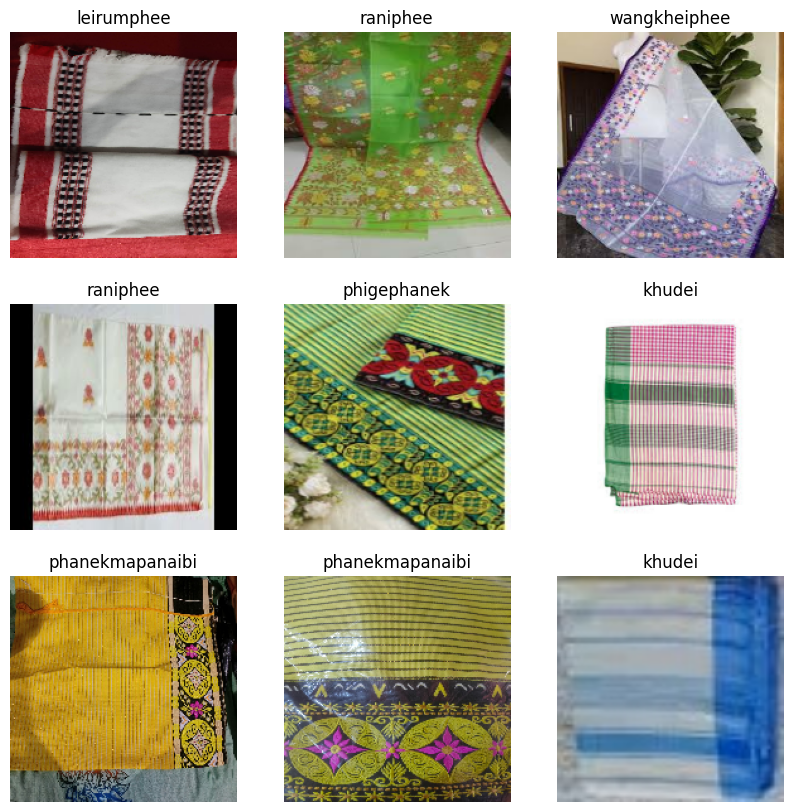

In [17]:
''' Outcome
This code will create a 3x3 grid of the first 9 images in data_train, with each image labeled with its corresponding class from phee_classes.'''
plt.figure(figsize=(10,10))#size of 10x10 inches
for image, labels in data_train.take(1):#This grabs the first batch of images and labels from data_train (tf.data.Dataset).image will be a batch of images with shape (batch_size, height, width, channels), and labels will be the corresponding class labels for those images.
    for i in range(9):#This loops through the first 9 images in the batch (i ranges from 0 to 8).
        plt.subplot(3,3,i+1)# creates a 3x3 grid of subplots (9 total) and places each image in one of the subplots.
        plt.imshow(image[i].numpy().astype('uint8'))#displays the image in the current subplot. .astype('uint8'): Converts the image data to an unsigned 8-bit integer format (0-255) so it can be properly displayed.
        plt.title(phee_classes[labels[i]])#Uses the label for the i-th image to look up the corresponding class name from phee_classes (a list of class names).
        plt.axis('off')#Disables the axis labels and ticks for a cleaner image display.

In [18]:
# Data Autotune in machine learning refers to the process of automatically selecting the best hyperparameters for a model, ensuring it performs optimally.
#The purpose of auto-tuning is to streamline the model training process by finding the ideal combination of parameters without requiring extensive manual tuning.
AUTOTUNE = tf.data.AUTOTUNE
train_ds = data_train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = data_val.cache().prefetch(buffer_size = AUTOTUNE)


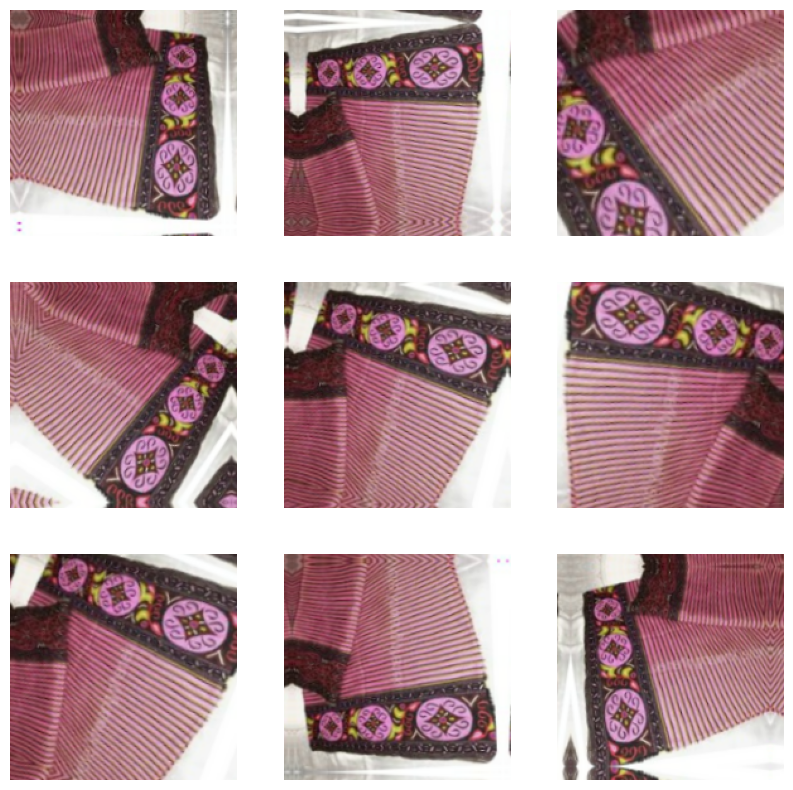

In [54]:


img_size = 224  # Set your image size here (adjust if needed)

# Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),#randomly flips the image left-to-right and defines the expected shape of the input image: 224x224 with 3 color channels (RGB).
    layers.RandomRotation(0.3),#randomly rotates the image by ±30% of a full circle.
    layers.RandomZoom(0.3)#randomly zooms the image in or out by 30%.
])

plt.figure(figsize=(10, 10))

# Apply augmentation and plot 9 different augmented versions of the **same** image
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")
plt.show()


In [25]:
model.compile(
    optimizer='adam',#Adam (Adaptive Moment Estimation) is a widely used optimizer that adjusts learning rates during training for better convergence.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#This loss function is used for multi-class classification problems.
#from_logits=True tells Keras that the model's last layer does NOT include a softmax activation

    metrics=['accuracy']#Tells Keras to track and report accuracy during training and evaluation.
)

In [26]:
epochs_size = 30 #Sets the number of training epochs to 30.An epoch is one full pass through the entire training dataset.


history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)
''' model.fit(...):
Trains the model on data_train (tf.data.Dataset or similar object).

Evaluates performance on data_val at the end of each epoch.

Runs for 30 epochs, as defined above.'''

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 729ms/step - accuracy: 0.1451 - loss: 4.9359 - val_accuracy: 0.2203 - val_loss: 2.0044
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - accuracy: 0.3010 - loss: 1.9643 - val_accuracy: 0.2203 - val_loss: 1.8959
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.5117 - loss: 1.5927 - val_accuracy: 0.2542 - val_loss: 1.8852
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.5433 - loss: 1.3556 - val_accuracy: 0.5254 - val_loss: 1.4770
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.7006 - loss: 1.0967 - val_accuracy: 0.5254 - val_loss: 1.3416
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.7143 - loss: 0.9223 - val_accuracy: 0.7627 - val_loss: 0.9319
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step - accuracy: 0.8392 - loss: 0.6815 - val_accuracy: 0.6780 - val_loss: 0.7571
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 0.8155 - loss: 0.5147 - val_accuracy: 0.8475 - val_loss

' model.fit(...):\nTrains the model on data_train (tf.data.Dataset or similar object).\n\nEvaluates performance on data_val at the end of each epoch.\n\nRuns for 30 epochs, as defined above.'

Text(0.5, 1.0, 'Loss')

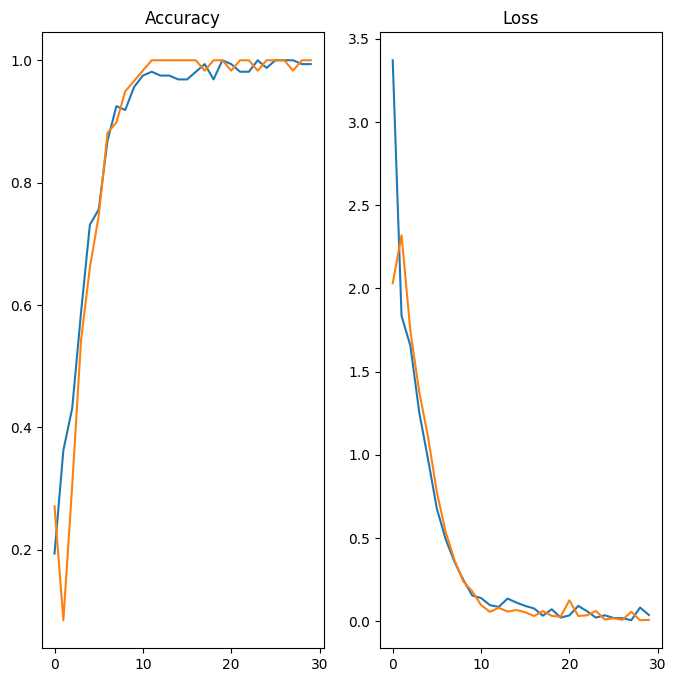

In [ ]:
epochs_range = range(epochs_size)  #Creates a range of numbers from 0 to epochs_size - 1.
plt.figure(figsize=(8,8))  #Sets the size of the overall figure — 8 inches by 8 inches.

plt.subplot(1,2,1)#Creates the first subplot (1 row, 2 columns, 1st plot) — this will be for accuracy

#Plots training accuracy and validation accuracy over epochs.
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)#Moves to the second subplot — for loss.
#Plots training loss and validation loss over epochs.
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [29]:
model.evaluate(data_test)#IT is used to evaluate the performance of your trained Keras model on a test dataset.



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 0.9647 - loss: 0.0853


[0.0631425753235817, 0.9684210419654846]

In [30]:
model.evaluate(data_train)#it is used to evaluate the performance of your trained Keras model on the training dataset (data_train).



5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 1.0000 - loss: 0.0012


[0.0013295637909322977, 1.0]

In [31]:
model.evaluate(data_val)#it is used to evaluate the performance of your trained model on the validation dataset (data_val).


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 0.0019


[0.002037493512034416, 1.0]

In [56]:
def classify_images(image_path):#Loads the image from the given path (image_path).
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))#Resizes the image to 180x180 pixels to match the expected input size of the model.
    input_image_array = tf.keras.utils.img_to_array(input_image)#Converts the PIL image into a NumPy array (with shape (180, 180, 3)) so it can be processed by the model.
    input_image_exp_dim = tf.expand_dims(input_image_array,0)
    predictions = model.predict(input_image_exp_dim)  #Runs the image through the model and gets the raw output logits (unnormalized scores).

    result = tf.nn.softmax(predictions[0])#Applies the softmax function to convert the logits into probabilities that sum to 1.

    outcome = 'The Manipuri Phee belongs to ' + phee_classes[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [57]:
classify_images('kokyet1.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


'The Manipuri Phee belongs to kokyet with a score of 99.59713'

In [40]:
model.save('PheeRecogModel8.h5')#it is used to save a trained Keras model (using the TensorFlow or standalone Keras library) in the HDF5 (Hierarchical Data Format version 5) (.h5) format

In [41]:
model.save('PheeRecogModel8.keras')#It's the new standard supported natively by Keras and TensorFlow going forward.

In [59]:

# Define transformations for the dataset.transforms.Compose(...): Combines several image transformations into a single pipeline.
transform = transforms.Compose([
    transforms.ToTensor(),#Converts a PIL Image or NumPy ndarray into a PyTorch tensor and scales the pixel values to [0.0, 1.0]
    transforms.Normalize((0.5,), (0.5,))#Normalizes the image tensor with a mean of 0.5 and a standard deviation of 0.5.
])

''' Load the dataset (e.g., MNIST)
datasets.MNIST: Loads the MNIST dataset (handwritten digits).

root='./data': Directory where the dataset will be stored.

train=True: Loads the training portion of the dataset (60,000 images).

download=True: Downloads the dataset if it’s not already in the specified directory.

transform=transform: Applies the transformation pipeline defined above to every image.
'''
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)



# Define the sizes for each split

train_size = int(0.8 * len(dataset))# 80% of the dataset (48,000 samples).
val_size = int(0.1 * len(dataset))#10% of the dataset (6,000 samples).
test_size = len(dataset) - train_size - val_size #Remaining 10% (6,000 samples), calculated to ensure the total adds up to 60,000.

# Split the dataset.Randomly partitions the dataset into non-overlapping subsets with the specified sizes.
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for each split
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)# Each batch contains 64 samples. (training loader only): Randomizes the order of data at each epoch to improve training.
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)#(validation loaders): Keeps the order fixed to ensure consistent evaluation.
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)#(test loaders): Keeps the order fixed to ensure consistent evaluation.
